# COM calculation
## Load all tiffs in scan folder, average, plot centre of mass of residuals in 2D

In [5]:
import tifffile as tif
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import center_of_mass as com
from scipy.optimize import curve_fit
import os
from scipy.signal import detrend
import scipy.io as sio
from tqdm import tqdm_notebook

In [6]:
%matplotlib inline

#Needs to follow inline magick command
import matplotlib
plt.style.use('seaborn-white')
matplotlib.rc('font',family='Times New Roman')
matplotlib.rcParams['font.size'] = 32
plt.rcParams['image.cmap'] = 'viridis'

## Change following variables as required

In [9]:
imgsperpt=1 #Acquisitions per scan point
ny, nx=51,41 #Scan dimensions
scan_number=95
path='/CNMshare/savedata/2018R3/20181211/Images/%d/'  %scan_number #Scan path

#ROI of data you want to analyze
roix1=128
roix2=roix1+160
roiy1=150
roiy2=roiy1+192

detx,dety=512,512

In [10]:
files=sorted(os.listdir(path))
nfiles=len(files)
npts=ny*nx


data=np.zeros((npts,roiy2-roiy1,roix2-roix1),float)
i,j=0,0
for fl in tqdm_notebook(files):
    data[i,:,:]=tif.imread(path+fl)[roiy1:roiy2,roix1:roix2]
    j+=1
    if(j%imgsperpt==0): i+=1
    if(i>=npts): break
print (i,j, data.shape)

KeyboardInterrupt: 

## Subtract average detector image from each frame

In [79]:
avg_intens=np.average(data, axis=0)
data2=data-avg_intens
#data2=data

## Plot average intensity and ith frame

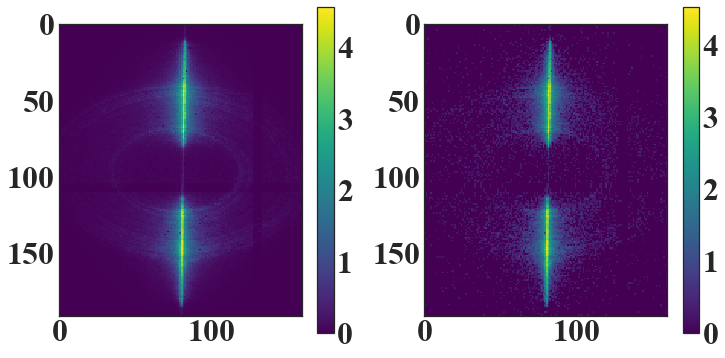

In [80]:
i=0
figs,ax=plt.subplots(1,2,figsize=(12,6))
im=ax[0].imshow(np.log10(avg_intens+1))
plt.colorbar(im,ax=ax[0])
im=ax[1].imshow(np.log10(data[0]+1))
plt.colorbar(im,ax=ax[1])

## Plot data after subtracting average from each frame

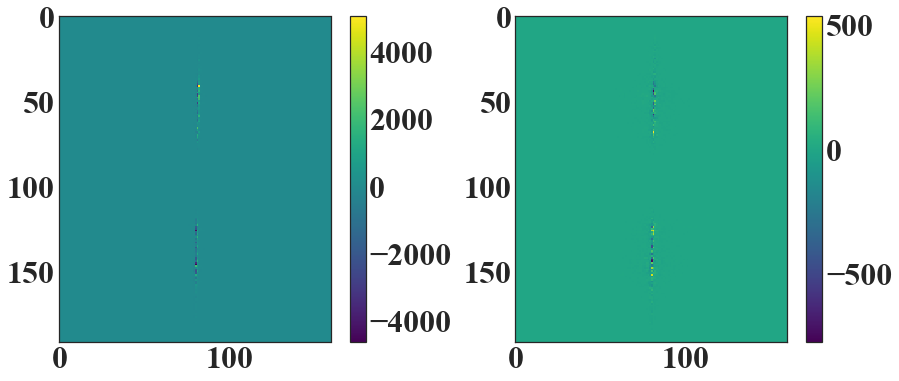

In [81]:
i,j=0,1000
figs,ax=plt.subplots(1,2,figsize=(15,6))
im=ax[0].imshow(data2[i])
plt.colorbar(im,ax=ax[0])
im=ax[1].imshow(data2[j])
plt.colorbar(im,ax=ax[1])

## Calculate centre of masses, subtract the COM of the first image
### All centroid shift is now relative

In [82]:
coms=np.zeros((npts,2),float)
for i in range(npts):
    coms[i,:]=np.asarray(com(data[i,:,:]))

print (coms[0], coms[1000])
coms-=coms[0,:]
print (coms[0], coms[1000])

[95.28238867 80.73494484] [96.37683964 80.65640578]
[0. 0.] [ 1.09445097 -0.07853906]


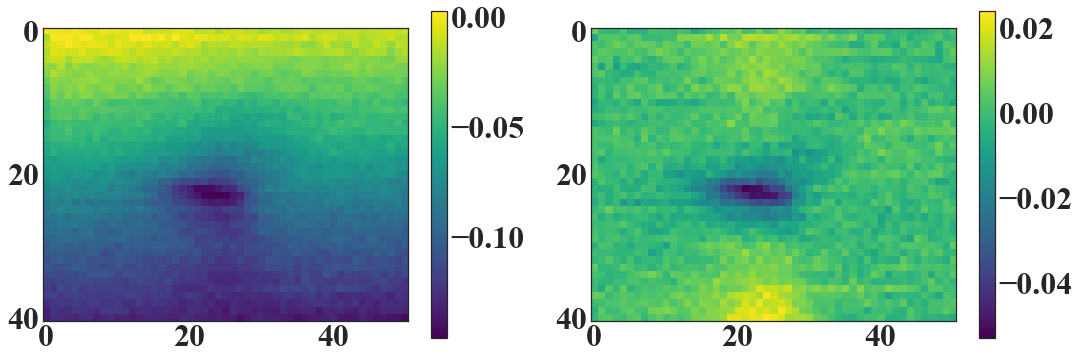

In [83]:
coms=coms.reshape(nx,ny,2)
figs,ax=plt.subplots(1,2,figsize=(18,6))
im=ax[0].imshow(coms[:,:,1])
plt.colorbar(im,ax=ax[0])

tmp2=detrend(coms[:,:,1], axis=0)
im=ax[1].imshow(tmp2)
plt.colorbar(im,ax=ax[1])

In [36]:
#sio.savemat('raw_data.mat', {'data':data})